In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
$$

# Introduction

In this lesson, we'll introduce ourselves to an important concept for machine learning and deep learning: the norm. Norms are what we generally use to evaluate the error of our models. For instance, it is used to calculate the error between the output of a neural network and what is expected (the actual label or value). You can think of the norm as the length of a vector. It is a function that maps a vector to a positive value. Different functions can be used and we will see few examples.

# 2.5 Norms

#### Definition
Given vectors $x$ and $y$ of length one, which are simply scalars $x$ and $y$, the most natural notion of distance between $x$ and $y$ is obtained from the absolute value. Therefore we define the distance to be $\lvert{x − y}\rvert$. We can therefore define a distance function for vectors that has similar properties.

A function $\lvert\lvert \cdot \rvert\rvert \colon \mathbb{R}^{n} \rightarrow
 \mathbb{R}$ is called a vector norm if it has the following properties:

>$\lvert\lvert \bs{x} \rvert\rvert \ge 0 \text{ for any vector } \bs{x} \in \mathbb R^{n}, \text{ and } \lvert\lvert \bs{x} \rvert\rvert = 0 \text{ if and only if } \bs{x} = 0$

>$\lvert\lvert \alpha \bs{x} \rvert\rvert = \lvert \alpha \rvert \lvert\lvert \bs{x} \rvert\rvert \text{ for any vector } \bs{x} \in \mathbb R^{n} \text{ and any } \alpha \in \mathbb R$

>$\lvert\lvert \bs{x} + \bs{y} \rvert\rvert \le \lvert\lvert \bs{x} \rvert\rvert + \lvert\lvert \bs{y} \rvert\rvert \text { for any vectors } \bs{x},\bs{y} \in \mathbb R^{n}$

That last property is called the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality). It should be noted that when $n = 1$, the absolute value function is a vector norm.


#### A note on notation
>Norms are usually represented with two horizontal bars: $\norm{\bs{x}}$

>When we say that $x \in \mathbb R$, we mean that $x$ is a (one-dimensional) scalar that happens to be a real number. For example, we might have $x=1$ or $x=-12$.

>On the other hand, when we say that $\vec x \in \mathbb R^2$, we mean that $\vec x$ is a two-dimensional vector whose two components are both real numbers. In other words, $\vec x$ is an ordered pair in the Cartesian plane that has the form $(x_1, x_2)$, where $x_1,x_2 \in \mathbb R$. For example, we might have $\vec x = (-1, 7)$, or $\vec x = (\pi, 2.54)$.

>When we define a function $\lvert\lvert \cdot \rvert\rvert \colon \mathbb R^2 \to \mathbb R$, we mean that the function $\lvert\lvert \cdot \rvert\rvert$ maps each ordered pair (which contains two numbers as input) to a single number (as output). For example, we could define such a mapping by:

$$\lvert\lvert (x_1, x_2) \rvert\rvert = 2x_1 + 3x_2$$

>In this case,  the function $\lvert\lvert \cdot \rvert\rvert$ would map vector $\vec x = (-1, 7)$ to $2(-1) + 3(7) = 19$.



# The triangle inequity

In plain English, the norm of the sum of some vectors is less than or equal to the sum of the norms of these vectors.

$$
\norm{\bs{x}+\bs{y}} \leq \norm{\bs{x}}+\norm{\bs{y}}
$$

### Example 1.

$$
\bs{x}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}
$$

and

$$
\bs{y}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}
$$

$$
\norm{\bs{x}+\bs{y}} = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43
$$

$$
\norm{\bs{x}}+\norm{\bs{y}} = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55
$$

Let's check these results:

In [4]:
x = np.array([1, 6])
x

array([1, 6])

In [5]:
y = np.array([4, 2])
y

array([4, 2])

In [6]:
x+y

array([5, 8])

In [7]:
np.linalg.norm(x+y)

9.4339811320566032

In [8]:
np.linalg.norm(x)+np.linalg.norm(y)

10.554898485297798

Geometrically, this simply means that the shortest path between two points is a line.

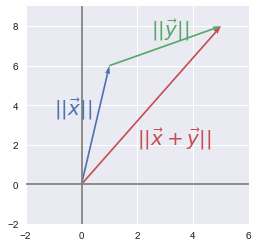

In [11]:
x = [0,0,1,6]
y = [0,0,4,2]
x_bis = [1,6,y[2],y[3]]
w = [0,0,5,8]
plt.quiver([x[0], x_bis[0], w[0]],
           [x[1], x_bis[1], w[1]],
           [x[2], x_bis[2], w[2]],
           [x[3], x_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{x}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{y}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{x}+\vec{y}||$', color=sns.color_palette()[2], size=20)

# P Norms
Once you get deep into machine learning algorithms, you'll eventually be faced with choosing between the $L^1$-norm or the $L^2$-norm for your model's **loss function**, which tries to minimize the difference between predicted and true values when estimating parameters.

If you want to make an informed decision about your loss functions, then you need to become familiar with the **vector norms**.

The most commonly used vector norms belong to the family of $p$-norms, or $\ell_{p}$-norms, which are defined by:

$$\left\| x \right\| _p = \left( |x_1|^p + |x_2|^p + \dotsb + |x_n|^p \right) ^{1/p}$$

which can be more concisely expressed with the formula:

$$\norm{\bs{x}}_p=(\sum_{i}^{n}|\bs{x}_i|^p)^{1/p}$$

In plain English, this is how you calculate the $p$-norm of a vector:

1. Calculate the absolute value of each element
2. Raise each of those absolute values to the power $p$
3. Sum all of these powered absolute values
4. Raise this result to the power $\frac{1}{p}$

Let's make this a bit more concrete by looking at some widely used $p$-norms.

# The $L^0$ norm
Raise any positive number to the $0^{th}$ power and you get $1$. And since $0^{0}$ is undefined, the $L^0$ norm gives the number of non-zero elements within a vector. 

>Technically speaking, the $L^0$ norm isn't really a norm. If you look at calculation #4 above, you'll see that when $p=0$, you can't perform $\frac{1}{p}$ since you can't divide by $0$. The real reason for the name $L^0$ is that it is the limit as $p\rightarrow0$ of the $L^p$ norm:

$$\norm{\bs{x}}_0 = \lim_{p\rightarrow0} \sum^{n}_{k-1}|\bs{x}_k|^p$$

In short, The $L^0$ norm is the number of non-zero elements in a vector.

# The $L^1$ norm

When $p=1$, you have the $L^1$ norm, which is simply the sum of the absolute values:

$$
\norm{\bs{x}}_1=\sum_{i} |\bs{x}_i|
$$

The $L^1$-norm is also known as [least absolute deviations (LAD)](https://en.wikipedia.org/wiki/Least_absolute_deviations). This norm is used to minimize the sum of the absolute differences $S$ between the target value $Y_i$ and the estimated values $f(x_i)$:

$$S = \sum^{n}_{i=1}|y_i-f(x_i)|$$

# The Euclidean norm ($L^2$ norm)

When $p=2$, you have what's called the Euclidean norm. Why is it called the Euclidean norm? Because the $L^2$ norm gives the distance from the origin to the point $X$, a consequence of the Pythagorean theorem. 

$$
\norm{\bs{x}}_2=(\sum_i \bs{x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i \bs{x}_i^2}
$$

The $L^2$-norm is also known as least squares and "SRSS", which is an acronym for the square root of the sum of squares. 

In machine learning, it is used to minimuze the sum of the square of the differences $S$ between the target value $Y_i$ and the estimated values $f(x_i)$:

$$S = \sum^{n}_{i=1}(y_i-f(x_i))^2$$

Let's see an example of this norm:

### Example 2.

Graphically, the Euclidean norm corresponds to the length of the vector from the origin to the point obtained by linear combination (like applying Pythagorean theorem).

$$
\bs{u}=
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
$$

$$
\begin{align*}
\norm{\bs{u}}_2 &=\sqrt{|3|^2+|4|^2}\\\\
&=\sqrt{25}\\\\
&=5
\end{align*}
$$


So the $L^2$ norm is $5$.

The $L^2$ norm can be calculated with the `linalg.norm` function from numpy. We can check the result:

In [45]:
np.linalg.norm([3, 4])

5.0

Here is the graphical representation of the vectors:

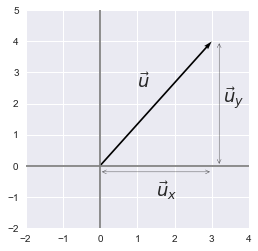

In [13]:
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

In this case, the vector is in a 2-dimensional space, so it's easy to visualize.

But you can also apply this norm to higher dimensional spaces.

$$
u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}
$$

$$
||u||_2 = \sqrt{u_1^2+u_2^2+\cdots+u_n^2}
$$


# The squared Euclidean norm (squared $L^2$ norm)

$$
\sum_i|\bs{x}_i|^2
$$


The squared $L^2$ norm is convenient because it removes the square root and we end up with the simple sum of every squared values of the vector. 

The squared Euclidean norm is widely used in machine learning partly because it can be calculated with the vector operation $\bs{x}^\text{T}\bs{x}$. Operations like this yield performance gains: see [here](https://softwareengineering.stackexchange.com/questions/312445/why-does-expressing-calculations-as-matrix-multiplications-make-them-faster) and [here](https://www.quora.com/What-makes-vector-operations-faster-than-for-loops) for more details.

### Example 3.

$$
\bs{x}=
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}
$$

$$
\bs{x}^\text{T}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix}
$$

$$
\begin{align*}
\bs{x}^\text{T}\bs{x}&=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}\\\\
&= 2\times 2 + 5\times 5 + 3\times 3 + 3\times 3= 47
\end{align*}
$$

In [14]:
x = np.array([[2], [5], [3], [3]])
x

array([[2],
       [5],
       [3],
       [3]])

In [15]:
euclideanNorm = x.T.dot(x)
euclideanNorm

array([[47]])

In [16]:
np.linalg.norm(x)**2

47.0

They're the same!

## Derivative of the squared $L^2$ norm

Another advantage of the squared $L^2$ norm is that its partial derivative is easily computed:

$$
u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}
$$

$$
\norm{u}_2 = u_1^2+u_2^2+\cdots+u_n^2
$$

$$
\begin{cases}
\dfrac{d\norm{u}_2}{du_1} = 2u_1\\\\
\dfrac{d\norm{u}_2}{du_2} = 2u_2\\\\
\cdots\\\\
\dfrac{d\norm{u}_2}{du_n} = 2u_n
\end{cases}
$$

## Derivative of the $L^2$ norm

In the case of the $L^2$ norm, the derivative is more complicated and takes every elements of the vector into account:

$$
\norm{u}_2 = \sqrt{(u_1^2+u_2^2+\cdots+u_n^2)} = (u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}
$$

$$
\begin{align*}
\dfrac{d\norm{u}_2}{du_1} &=
\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}-1}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{-\frac{1}{2}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
2\cdot u_1\\\\
&=\dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{align*}
$$

$$
\begin{cases}
\dfrac{d\norm{u}_2}{du_1} = \dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\dfrac{d\norm{u}_2}{du_2} = \dfrac{u_2}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\cdots\\\\
\dfrac{d\norm{u}_2}{du_n} = \dfrac{u_n}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{cases}
$$

>### Why is it important to easily and quickly calculate these partial derivatives?
> calculus, you use derivatives to understand how functions change over time. In machine learning, you can apply this concept to find models with parameters that minimize prediction error.

>#### Partial derivatives
>In functions with 2 or more variables, the partial derivative is the derivative of one variable with respect to the others. If we change $x$, but hold all other variables constant, how does $f(x,z)$ change? That’s one partial derivative. The next variable is $z$. If we change $z$ but hold $x$ constant, how does $f(x,z)$ change? Once calculate all of the partial derivatices, you store them in something called a gradient, which represents the full derivative of the multivariable function.

>#### Gradients
>A gradient is a vector that stores the partial derivatives of multivariable functions. It helps us calculate the slope at a specific point on a curve for functions with multiple independent variables. In order to calculate this more complex slope, we need to isolate each variable to determine how it impacts the output on its own. To do this we iterate through each of the variables and calculate the derivative of the function after holding all other variables constant. Each iteration produces a partial derivative which we store in the gradient.

>#### Gradient Descent
>Gradient descent is  the iterative optimization algorithm for finding the minimum of a function. In machine learning, this means we're finding a model that minimizes the error of our predictions.

One problem of the squared $L^2$ norm is that it hardly discriminates between 0 and small values because the increase of the function is slow.

We can see this by graphically comparing the squared $L^2$ norm with the $L^2$ norm. The $z$-axis corresponds to the norm and the $x$- and $y$-axis correspond to two parameters. The same thing is true with more than 2 dimensions but it would be hard to visualize that!

$L^2$ norm:

<img src="images/l2-norm.png" width="500" alt="Representation of the L2 norm" title="The L2 norm">
<em>The L2 norm</em>

Squared $L^2$ norm:

<img src="images/squared-l2-norm.png" width="500" alt="Representation of the squared L2 norm" title="The squared L2 norm">
<em>The squared L2 norm</em>

$L^1$ norm:

<img src="images/L1-norm.png" alt="Representation of the L1 norm" title="The L1 norm" width="500">
<em>The L1 norm</em>

These plots were made with the help of this [website](https://academo.org/demos/3d-surface-plotter/).

# The max norm

The $L^\infty$ norm corresponds to the absolute value of the greatest element of the vector.

$$
\norm{\bs{x}}_\infty = \max\limits_i|x_i|
$$

The length of a vector can be calculated using the max norm.

Max norm is also used as a regularization in machine learning, such as on neural network weights, called max norm regularization.

In [20]:
a = array([1, 2, 3,10,99])
a

array([ 1,  2,  3, 10, 99])

In [21]:
maxnorm = norm(a, inf)
print(maxnorm)

99.0


# Matrix norms: the Frobenius norm
The Frobenius norm is equivalent to taking the $L^2$ norm of a matrix after flattening it. 

$$
\norm{\bs{A}}_F=\sqrt{\sum_{i,j}A^2_{i,j}}
$$

>#### Regularization
This norm is most often used as for regularization, which is the process of introducing additional information in order to solve an [ill-posed problem](https://en.wikipedia.org/wiki/Well-posed_problem) or to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting). One particular use of regularization is in the field of classification. Empirical learning of classifiers (learning from a finite data set) is always an underdetermined problem, because in general we are trying to infer a function of any $x$ given only some examples $x_{1},x_{2},\dots x_{n}$. Thus, in classification problems, a regularization term (or regularizer) $R(f)$ can be added to a loss function.

Let's see how we can peform this operation with numpy:

In [24]:
A = np.array([[1, 2], [6, 4], [3, 2]])
A

array([[1, 2],
       [6, 4],
       [3, 2]])

In [25]:
np.linalg.norm(A)

8.3666002653407556

# Finding the angle between two vectors.
Suppose we are interested in finding the angle between two given vectors, $\bs{x}$ and $\bs{y}$.

Suppose we have two $n$-dimensional vectors $\bs{x}$ and $\bs{y}$ as shown below:

$$x=\left( \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ \vdots \\x_n \end{array} \right) \textrm{ and } y=\left( \begin{array}{c} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n \end{array} \right)$$

In a previous lesson, we defined the dot product like this:

$$x \cdot y = x_1 y_1 + x_2 y_2 + x_3 y_3 + \cdots + x_n y_n$$

We also noted that the dot product is commutative:

$$\begin{array}{rcl} 
x \cdot y & = & x_1 y_1 + x_2 y_2 \cdots + x_n y_n \\ 
& = & y_1 x_1 + y_2 x_2 \cdots + y_n x_n \\ 
& = & y \cdot x 
\end{array}$$

We also showed that the dot product distributes over vector sums:

$$\begin{array}{rcl} 
x \cdot (y + z) & = & x_1 (y_1 + z_1) + x_2 (y_2 + z_2) + \cdots x_n (y_n + z_n)\\ 
& = & x_1 y_1 + x_1 z_1 + x_2 y_2 + x_2 z_2 + \cdots + x_n y_n + x_n z_n\\ 
& = & (x_1 y_1 + x_2 y_2 \cdots + x_n y_n) + (x_1 z_1 + x_2 z_2 \cdots + x_n z_n)\\ 
& = & x \cdot y + x \cdot z 
\end{array}$$

We also noted that for any scalar $k$, we have:

$$\begin{array}{rcl} 
(kx) \cdot y & = & kx_1 y_1 + kx_2 y_2 + \cdots + kx_n y_n\\ 
& = & k(x_1 y_1 + x_2 y_2 \cdots + x_n y_n)\\ 
& = & k(x \cdot y) 
\end{array}$$

We will use these three properties in our calculation below.

But first, recall how we defined $L^2$-norm of a vector above:

$$||x||_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$$

The $L^2$-norm is meant to be geometrically interpreted as the length of the vector, or equivalently, the distance between the points $(0,0,...,0)$ and $(x_1,x_2,...,x_n)$.

Interestingly, note how the $L^2$-norm can be written in a much shorter way by invoking the dot product:

$$||x||_2 = \sqrt{x \cdot x}$$

Now, armed with the ideas of the dot product and the norm of a vector, suppose we are interested in finding the angle between two given vectors, $\bs{x}$ and $\bs{y}$.

Although you probably don't remember the [Law of Cosines](https://en.wikipedia.org/wiki/Law_of_cosines) from your high school geometry class, we're going to use it since it is a generalization on the Pythagorean Theorem and gives us the relationship between the side lengths of an arbitrary triangle. Specifically, if a triangle has side lengths $a$, $b$, and $c$, then:

$$a^2 + b^2 - 2ab\cos \theta = c^2$$

where $\theta$ is the angle between the sides of length $a$ and $b$.

As an example, consider the triangle that can be formed from the vectors $\bs{x}$, $\bs{y}$, and $\bs{x−y}$:

<img src="images/triangle.png" height=250 width =250 img>

Applying the Law of Cosines to this triangle, we have:

$$||x||_2 +||y||_2 - 2||x||_2 \, ||y||_2\cos \theta = ||x-y||_2$$

But this implies, using our observations about the dot product made above, that:

$$\begin{array}{rcl} 
(x \cdot x) + (y \cdot y) - 2||x||_2 \, ||y||_2\cos \theta & = & (x-y) \cdot (x-y)\\ 
& = & x \cdot (x-y) - y \cdot (x-y)\\ 
& = & (x \cdot x) - (x \cdot y) - (y \cdot x) + (y \cdot y)\\ 
& = & (x \cdot x) - (x \cdot y) - (x \cdot y) + (y \cdot y)\\ 
& = & (x \cdot x) - 2(x \cdot y) + (y \cdot y)\\ 
\end{array}$$

Subtracting the common $(\bs{x}\cdot\bs{x})$ and $(\bs{y}\cdot\bs{y})$ from both sides, we find:

$$- 2||x||_2 \, ||y||_2\cos \theta = - 2(x \cdot y)$$

Solving for $\cos \theta$ tells us:

$$\cos \theta = \frac{x \cdot y}{||x||_2 \, ||y||_2}$$

Rearranging, we get:

$$x \cdot y = \norm{\bs{x}}_2\norm{\bs{y}}_2\cos\theta$$

Finally, the dot product can be expressed as

$$x \cdot y = x^\text{T}y$$

And if we substitute in $x^\text{T}y$, we get:

$$
x^\text{T}y = \norm{x}_2\cdot\norm{y}_2\cos\theta
$$

Which shows how the dot product can be expressed as the product of $L^2$ norms and $\cos\theta$.

### Example 4.
That was a whole bunch of math, so let's try to visualize this with a simple example.
$$
\bs{x}=
\begin{bmatrix}
    0 \\\\
    2
\end{bmatrix}
$$

and 

$$
\bs{y}=
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
$$

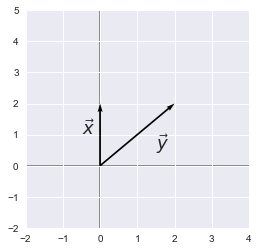

In [28]:
x = [0,0,0,2]
y = [0,0,2,2]

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.text(-0.5, 1, r'$\vec{x}$', size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', size=18)

plt.show()
plt.close()

We took this example for its simplicity. As we can see, the angle $\theta$ is equal to 45°.

$$
\bs{x^\text{T}y}=
\begin{bmatrix}
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
0\times2+2\times2 = 4
$$

and

$$
\norm{\bs{x}}_2=\sqrt{0^2+2^2}=\sqrt{4}=2
$$

$$
\norm{\bs{y}}_2=\sqrt{2^2+2^2}=\sqrt{8}
$$

$$
2\times\sqrt{8}\times cos(45)=4
$$

Here are the operations using numpy:

In [29]:
# Note: np.cos take the angle in radian
np.cos(np.deg2rad(45))*2*np.sqrt(8)

4.0000000000000009

# References
The proof for the dot products, norms, and angles between vectors came from [here](http://www.oxfordmathcenter.com/drupal7/node/168).

This lesson requried a lot of mathematical notation. A nice cheat sheet for these symbols can be found [here](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols#Dots).